In [1]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
import pandas as pd
import time
# from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score 
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, cohen_kappa_score, log_loss
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df1 = pd.read_csv("Covid Dataset.csv")
df1

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,No,...,Yes,Yes,No,No,No,No,No,No,No,Yes
5430,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,...,Yes,No,No,No,No,No,No,No,No,Yes
5431,Yes,Yes,Yes,No,No,No,No,No,Yes,No,...,No,No,No,No,No,No,No,No,No,No
5432,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,No,...,No,No,No,No,No,No,No,No,No,No


In [3]:
df1.replace({'Yes': 1, 'No': 0}, inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   Breathing Problem                        5434 non-null   int64
 1   Fever                                    5434 non-null   int64
 2   Dry Cough                                5434 non-null   int64
 3   Sore throat                              5434 non-null   int64
 4   Running Nose                             5434 non-null   int64
 5   Asthma                                   5434 non-null   int64
 6   Chronic Lung Disease                     5434 non-null   int64
 7   Headache                                 5434 non-null   int64
 8   Heart Disease                            5434 non-null   int64
 9   Diabetes                                 5434 non-null   int64
 10  Hyper Tension                            5434 non-null   int64
 11  Fati

In [4]:
df1

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,1,1,0,1,1,1,1,0,0,0,...,1,1,0,0,0,0,0,0,0,1
5430,1,1,1,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
5431,1,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5432,1,1,1,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Split the data into features (x) and target (y)
y = df1['COVID-19']
x = df1.drop(columns='COVID-19', axis=1)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [6]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
x_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [7]:
y.value_counts()

1    4383
0    1051
Name: COVID-19, dtype: int64

In [8]:
# Initialize a DataFrame to store results
results_df = pd.DataFrame(columns=['Model', 'Best Parameters', 'Best ROC AUC Score','Roc-auc Score', 'Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'F1 Score', 'Time Elapsed (s)'])

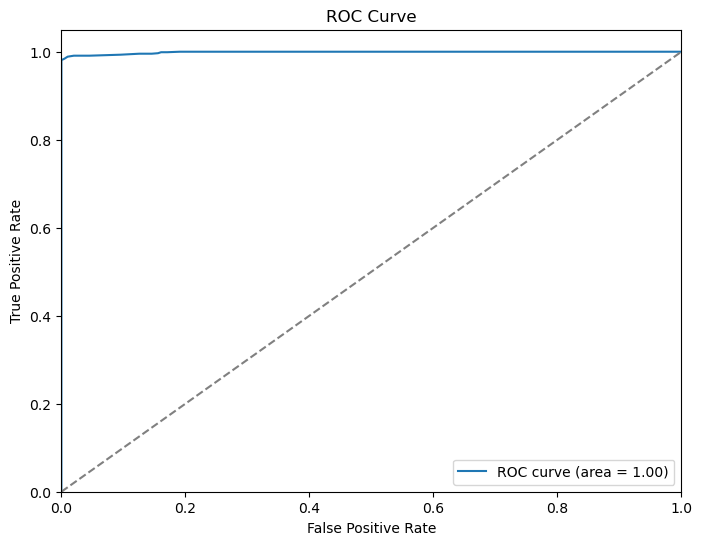

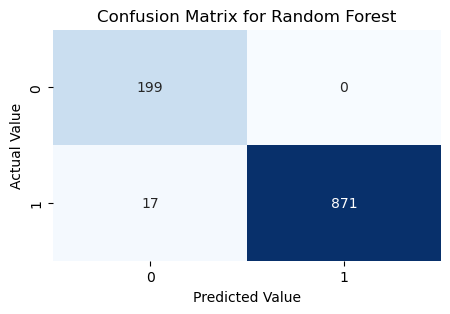

,Model,Best Parameters,Best ROC AUC Score,Roc-auc Score,Accuracy,Sensitivity,Specificity,Precision,F1 Score,Time Elapsed (s)
0,Random Forest,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.987391,0.998786,0.984361,0.980856,1.0,1.0,0.990335,0.238909


In [9]:
# Define a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 15],  
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='f1', error_score='raise')

grid_search.fit(x_train_resampled, y_train_resampled)

# Get the best model from the grid search
best_rf_model = grid_search.best_estimator_

best_params = grid_search.best_params_
best_roc_auc = grid_search.best_score_

start_time = time.time()

# Train the best model on the full training data
best_rf_model.fit(x_train_resampled, y_train_resampled)

elapsed_time = time.time() - start_time

# Predict on the test set
predictions = best_rf_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

# Compute ROC-AUC scores and plot ROC curve
y_scores = best_rf_model.predict_proba(X_test)[:, 1]  # For binary classification, we use the probability of the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


# Calculate specificity
# tn = len(y_test[y_test == 0]) - np.sum(predictions == 0)
# n = len(y_test) - np.sum(y_test == 0)
# specificity = tn / n

# Calculate specificity
tn = np.sum((y_test == 0) & (predictions == 0))
n = np.sum(y_test == 0)
specificity = tn / n


# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot Confusion Matrix using Seaborn heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

# Create a DataFrame to store results
results_df = results_df.append({
    "Model": "Random Forest",
    'Best Parameters': best_params,
    'Best ROC AUC Score': best_roc_auc,
    'Roc-auc Score': roc_auc,
    "Accuracy": accuracy,
    'Sensitivity': recall,
    'Specificity': specificity,
    'Precision': precision,
    'F1 Score': f1,
    "Time Elapsed (s)": elapsed_time
}, ignore_index=True)

# Print and save the results
results_df

In [10]:
# results_df.to_excel("res.xlsx")